In [4]:
import pandas as pd
import numpy as np


In [5]:
tradedata = pd.read_excel("/Users/simran28/UE Courses/DS Project/TradeData-final.xlsx", engine="openpyxl")

In [6]:
tradedata.head()

,period,reporterDesc,partnerDesc,cmdCode,Net-Weight,primaryValue
0,2017,Mali,World,7108,30512.13,1.254096e+09
1,2017,Mali,Belgium,7108,6.00,1.587510e+05
2,2017,Mali,India,7108,732.88,2.996141e+07
3,2017,Mali,South Africa,7108,18775.50,7.776511e+08
4,2017,Mali,Spain,7108,1.14,3.031588e+04


In [7]:
tradedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   period        149 non-null    int64  
 1   reporterDesc  149 non-null    object 
 2   partnerDesc   149 non-null    object 
 3   cmdCode       149 non-null    int64  
 4   Net-Weight    149 non-null    float64
 5   primaryValue  149 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 7.1+ KB


In [8]:
tradedata = tradedata.drop_duplicates()

In [9]:
missing_values = tradedata.isnull().sum()
missing_values

period          0
reporterDesc    0
partnerDesc     0
cmdCode         0
Net-Weight      0
primaryValue    0
dtype: int64

In [10]:
print(tradedata.dtypes)

period            int64
reporterDesc     object
partnerDesc      object
cmdCode           int64
Net-Weight      float64
primaryValue    float64
dtype: object


In [26]:
tradedata['period'] = pd.to_datetime(tradedata['period'], format='%Y')

In [12]:
tradedata['cmdCode'] = tradedata['cmdCode'].astype(str)

In [18]:

# Function to detect and handle outliers
def handle_outliers(tradedata, method='cap'):
    numerical_columns = tradedata.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numerical_columns:
        # Calculate IQR
        Q1 = tradedata[col].quantile(0.25)
        Q3 = tradedata[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = tradedata[(tradedata[col] < lower_bound) | (tradedata[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers detected.")


#         # Handle outliers based on the method
#         if method == 'cap':
#             tradedata[col] = tradedata[col].clip(lower=lower_bound, upper=upper_bound)
#         elif method == 'remove':
#             tradedata = tradedata[(tradedata[col] >= lower_bound) & (tradedata[col] <= upper_bound)]
    
#     return data

# # Detect and cap outliers
# cleaned_data = handle_outliers(data, method='cap')


In [21]:
import pandas as pd

def detect_outliers(tradedata):
    """
    Detect rows containing outliers in numerical columns using the IQR method.
    """
    outlier_rows = pd.DataFrame()  # To store rows with outliers
    numerical_columns = tradedata.select_dtypes(include=['float64', 'int64']).columns

    for col in numerical_columns:
        # Calculate IQR
        Q1 = tradedata[col].quantile(0.25)
        Q3 = tradedata[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find rows with outliers in the current column
        col_outliers = tradedata[(tradedata[col] < lower_bound) | (tradedata[col] > upper_bound)]
        
        # Combine rows with previous outliers (if any)
        outlier_rows = pd.concat([outlier_rows, col_outliers], axis=0)
    
    # Remove duplicate rows in case multiple columns have outliers in the same row
    outlier_rows = outlier_rows.drop_duplicates()
    
    return outlier_rows

# Detect outliers
outliers = detect_outliers(tradedata)

# Output the rows with outliers
print(f"Number of rows with outliers: {len(outliers)}")
print(outliers)


Number of rows with outliers: 32
        period  reporterDesc partnerDesc cmdCode  Net-Weight  primaryValue
20  2017-01-01  South Africa  Areas, nes    7108  127333.500  4.984932e+09
27  2017-01-01  South Africa       World  710813  127424.080  4.984980e+09
30  2017-01-01  South Africa  Areas, nes  710813  127333.500  4.984932e+09
31  2018-01-01          Mali       World    7108   61633.000  2.650883e+09
41  2018-01-01          Mali       World  710812   61633.000  2.650883e+09
51  2018-01-01  South Africa       World    7108  150480.024  5.407915e+09
55  2018-01-01  South Africa  Areas, nes    7108  150317.320  5.407735e+09
60  2018-01-01  South Africa       World  710813  150478.921  5.407909e+09
62  2018-01-01  South Africa  Areas, nes  710813  150317.320  5.407735e+09
63  2019-01-01          Mali       World    7108   65670.040  2.657101e+09
70  2019-01-01          Mali       World  710812   65670.040  2.657101e+09
77  2019-01-01  South Africa       World    7108  105043.832  4.621

In [ ]:
# Specify A Summary Of Cleaning Done And Results Achieved.
# - Remove Unnecessary Columns
# - Removed duplicates 
# - Handled missing values 
# - Column names standardised (Already)
# - Data Type correction (Date field)
# - Detected Outliers


In [22]:
# Perform descriptive statistics on numerical columns (Net-Weight and primaryValue)
stats = tradedata[['Net-Weight', 'primaryValue']].describe()

# Add quartile calculations to the stats
stats.loc['Q1'] = tradedata[['Net-Weight', 'primaryValue']].quantile(0.25)
stats.loc['Median (Q2)'] = tradedata[['Net-Weight', 'primaryValue']].median()
stats.loc['Q3'] = tradedata[['Net-Weight', 'primaryValue']].quantile(0.75)
stats.loc['Q4 (Max)'] = tradedata[['Net-Weight', 'primaryValue']].max()

# Print descriptive statistics
stats


,Net-Weight,primaryValue
count,149.000000,1.490000e+02
mean,27211.024826,1.265962e+09
std,60758.652677,2.285077e+09
min,0.000000,5.420000e-01
25%,1.103000,4.823620e+02
50%,45.000000,1.734617e+05
75%,18775.500000,1.297436e+09
max,330361.170000,7.307599e+09
Q1,1.103000,4.823620e+02
Median (Q2),45.000000,1.734617e+05


In [ ]:
# Statistics
# 1. Big Range: The Netweight goes from 0 to over 330,000, and the prices ranges from less than 1 to a 7.3 billion. There is a huge range of values
# 2. Mostly Smaller Values: Most of the weights and values are on the lower side, but a few very large numbers push the averages higher.
# 3. Large Spread: There’s a lot of variation in the data—some shipments are tiny, while others are enormous, both in weight and value.
# 4. Unusual Outliers: A small number of shipments have very high weights or values that stand out and don’t match the general trend.
# 5. Skewed Data: The data is uneven, with most shipments being small and a few being extremely large, which makes the overall numbers a bit lopsided.
# Most of the data lies within the lower quartiles (e.g., Q1 to Q3 for Net-Weight is 1.103 to 18,775.50, and for primaryValue is 482.36 to 1.3 billion), 

<Figure size 200x200 with 0 Axes>

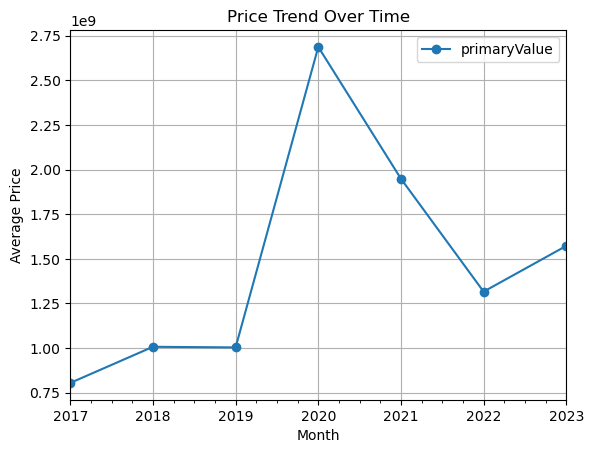

In [47]:
tradedata['Month'] = tradedata['period'].dt.to_period('M')
price_trend = pd.pivot_table(tradedata, values='primaryValue', index='Month', aggfunc='mean')
plt.figure(figsize=(2,2))
price_trend.plot(kind='line', marker='o')
plt.title('Price Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

Correlation matrix:
              Net-Weight  primaryValue
Net-Weight      1.000000      0.780359
primaryValue    0.780359      1.000000


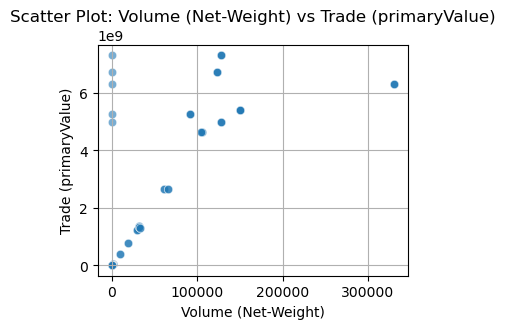

In [54]:
import seaborn as sns
cleaned_data = tradedata[['Net-Weight', 'primaryValue']].dropna()

# Calculate correlation
correlation = cleaned_data.corr(method='pearson')  # Pearson correlation by default

# Display the correlation
print("Correlation matrix:")
print(correlation)
# Scatter plot to visualize the relationship
plt.figure(figsize=(4, 3))
sns.scatterplot(x=cleaned_data['Net-Weight'], y=cleaned_data['primaryValue'], alpha=0.6)
plt.title('Scatter Plot: Volume (Net-Weight) vs Trade (primaryValue)')
plt.xlabel('Volume (Net-Weight)')
plt.ylabel('Trade (primaryValue)')
plt.grid(True)
plt.show()


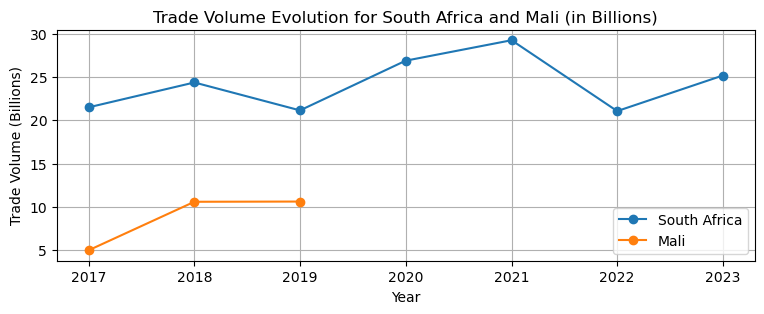

In [13]:
import matplotlib.pyplot as plt

# Filter data for South Africa and Mali as reporter or partner
south_africa_trade = tradedata[(tradedata['reporterDesc'] == 'South Africa') | 
                                 (tradedata['partnerDesc'] == 'South Africa')]
mali_trade = tradedata[(tradedata['reporterDesc'] == 'Mali') | 
                         (tradedata['partnerDesc'] == 'Mali')]

# Aggregate trade volume by year for South Africa
south_africa_yearly = south_africa_trade.groupby('period')['primaryValue'].sum().reset_index()

# Aggregate trade volume by year for Mali
mali_yearly = mali_trade.groupby('period')['primaryValue'].sum().reset_index()

# Plotting the trade volume trends for South Africa and Mali
plt.figure(figsize=(9, 3))
plt.plot(south_africa_yearly['period'], south_africa_yearly['primaryValue'] / 1e9, marker='o', label='South Africa')
plt.plot(mali_yearly['period'], mali_yearly['primaryValue'] / 1e9, marker='o', label='Mali')
plt.title('Trade Volume Evolution for South Africa and Mali (in Billions)')
plt.xlabel('Year')
plt.ylabel('Trade Volume (Billions)')
plt.legend()
plt.grid(True)
plt.show()

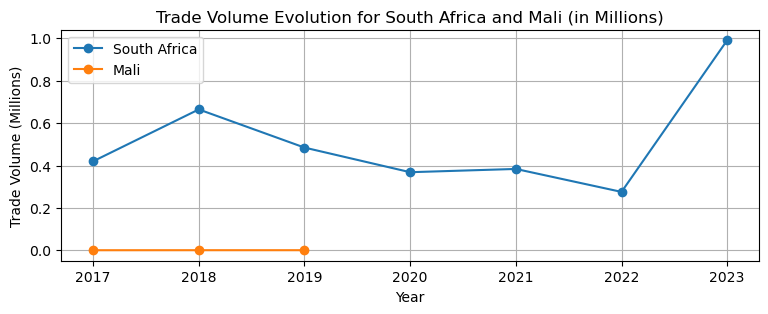

In [129]:
import matplotlib.pyplot as plt

# Filter data for South Africa and Mali as reporter or partner
south_africa_trade = tradedata[(tradedata['reporterDesc'] == 'South Africa') | 
                                 (tradedata['partnerDesc'] == 'South Africa')]
mali_trade = tradedata[(tradedata['reporterDesc'] == 'Mali') | 
                         (tradedata['partnerDesc'] == 'Mali')]

# Aggregate trade volume by year for South Africa
south_africa_yearly = south_africa_trade.groupby('period')['Net-Weight'].sum().reset_index()

# Aggregate trade volume by year for Mali
mali_yearly = mali_trade.groupby('period')['Net-Weight'].sum().reset_index()

# Plotting the trade volume trends for South Africa and Mali
plt.figure(figsize=(9,3))
plt.plot(south_africa_yearly['period'], south_africa_yearly['Net-Weight'] / 1e6, marker='o', label='South Africa')
plt.plot(mali_yearly['period'], mali_yearly['Net-Weight'] / 1e9, marker='o', label='Mali')
plt.title('Trade Volume Evolution for South Africa and Mali (in Millions)')
plt.xlabel('Year')
plt.ylabel('Trade Volume (Millions)')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x400 with 0 Axes>

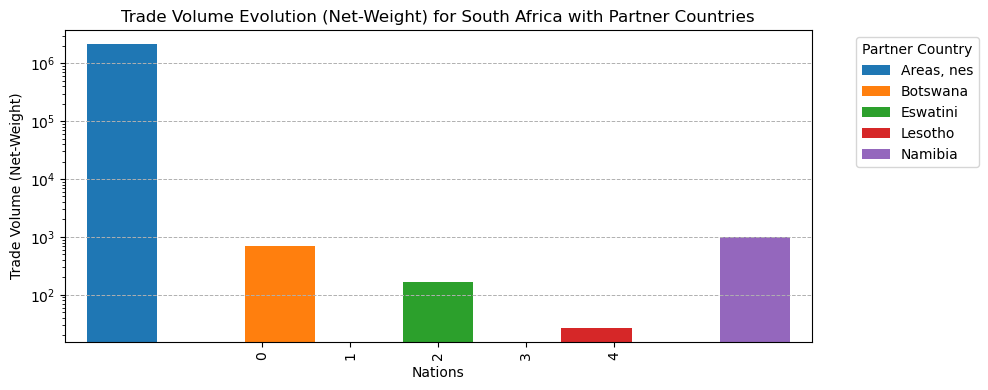

<Figure size 1000x400 with 0 Axes>

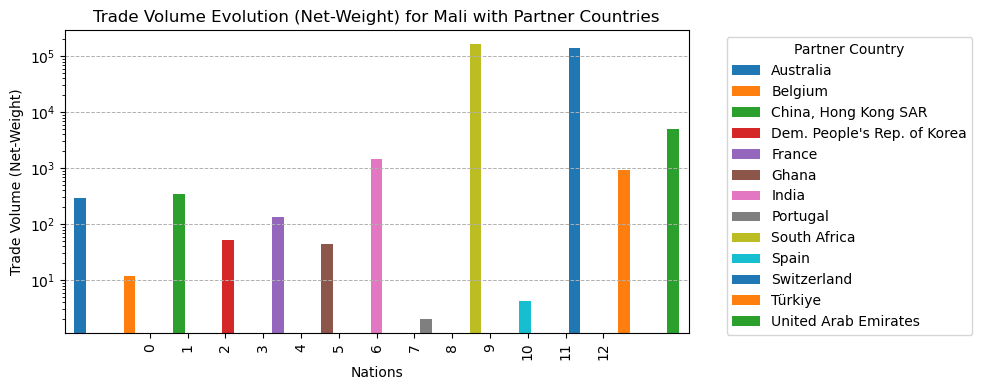

In [115]:
mali_grp = mali_data.groupby(['partnerDesc'])['Net-Weight'].sum().reset_index()
south_africa_grp = south_africa_data.groupby(['partnerDesc'])['Net-Weight'].sum().reset_index()

mali_pivot = mali_grp.pivot( columns='partnerDesc', values='Net-Weight').fillna(0)
south_africa_pivot = south_africa_grp.pivot( columns='partnerDesc', values='Net-Weight').fillna(0)

# Plot for South Africa
plt.figure(figsize=(10, 4))
south_africa_pivot.plot(kind='bar', figsize=(10, 4),width=4)
plt.title('Trade Volume Evolution (Net-Weight) for South Africa with Partner Countries')
plt.xlabel('Nations')
plt.ylabel('Trade Volume (Net-Weight)')
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.legend(title="Partner Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Plot for Mali
plt.figure(figsize=(10, 4))
mali_pivot.plot(kind='bar', figsize=(10, 4),width=4)
plt.title('Trade Volume Evolution (Net-Weight) for Mali with Partner Countries')
plt.xlabel('Nations')
plt.ylabel('Trade Volume (Net-Weight)')
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.legend(title="Partner Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()



<Figure size 1000x400 with 0 Axes>

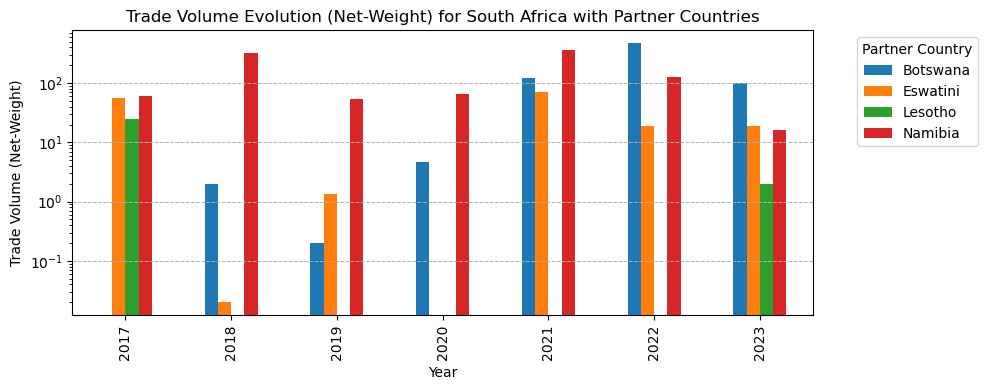

<Figure size 1000x400 with 0 Axes>

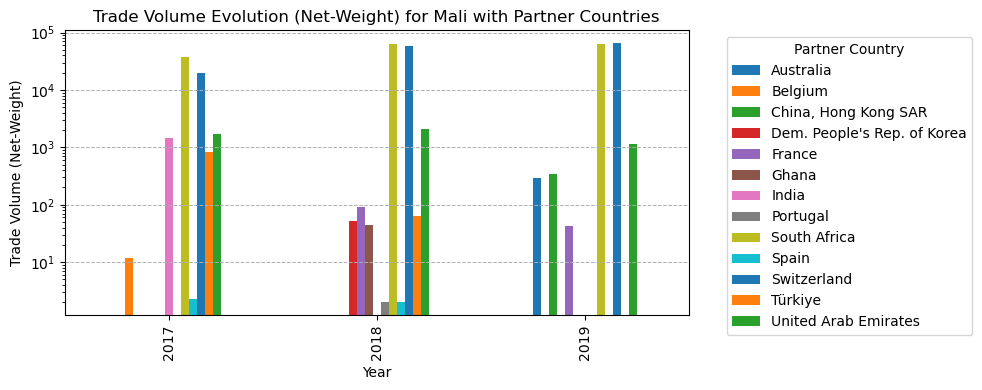

In [59]:
import numpy as np
# Convert 'period' to year if it is a datetime type
if pd.api.types.is_datetime64_any_dtype(tradedata['period']):
    tradedata['period'] = tradedata['period'].dt.year
else:
    tradedata['period'] = tradedata['period'].astype(int)

# Filter out rows where partnerDesc is "World" and "area,nes"
# sheet1_data_filtered = tradedata[tradedata['partnerDesc'] != {'World','Areas, nes'}]
sheet1_data_filtered = tradedata[~tradedata['partnerDesc'].isin(['World', 'Areas, nes'])]


# Filter data for Mali and South Africa separately
mali_data = sheet1_data_filtered[sheet1_data_filtered['reporterDesc'] == 'Mali']
south_africa_data = sheet1_data_filtered[sheet1_data_filtered['reporterDesc'] == 'South Africa']

# Group by period and partnerDesc (individual countries)
mali_grouped = mali_data.groupby(['period', 'partnerDesc'])['Net-Weight'].sum().reset_index()
south_africa_grouped = south_africa_data.groupby(['period', 'partnerDesc'])['Net-Weight'].sum().reset_index()

# Pivot data for plotting
mali_pivot = mali_grouped.pivot(index='period', columns='partnerDesc', values='Net-Weight').fillna(0)
south_africa_pivot = south_africa_grouped.pivot(index='period', columns='partnerDesc', values='Net-Weight').fillna(0)

# Plot for South Africa
plt.figure(figsize=(10, 4))
south_africa_pivot.plot(kind='bar', figsize=(10, 4))
plt.title('Trade Volume Evolution (Net-Weight) for South Africa with Partner Countries')
plt.xlabel('Year')
plt.ylabel('Trade Volume (Net-Weight)')
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.legend(title="Partner Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Plot for Mali
plt.figure(figsize=(10, 4))
mali_pivot.plot(kind='bar', figsize=(10, 4))
plt.title('Trade Volume Evolution (Net-Weight) for Mali with Partner Countries')
plt.xlabel('Year')
plt.ylabel('Trade Volume (Net-Weight)')
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.legend(title="Partner Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [125]:
# Define a function to format the Net-Weight values
def format_large_numbers(value):
    if value >= 1e9:
        return f'{value / 1e9:.2f}B'  # Format as billions
    elif value >= 1e6:
        return f'{value / 1e6:.2f}M'  # Format as millions
    else:
        return f'{value:,.0f}'       # Default formatting

# Group data by cmdCode and sum Net-Weight
cmd_group = tradedata.groupby(['cmdCode'])['Net-Weight'].sum().reset_index()

# Apply the formatting to the Net-Weight column
cmd_group['Formatted-Net-Weight'] = cmd_group['Net-Weight'].apply(format_large_numbers)

# Display the formatted output
cmd_group


,cmdCode,Net-Weight,Formatted-Net-Weight
0,7108,1626229.507,1.63M
1,710811,603.220,603
2,710812,316770.952,"316,771"
3,710813,2110839.020,2.11M


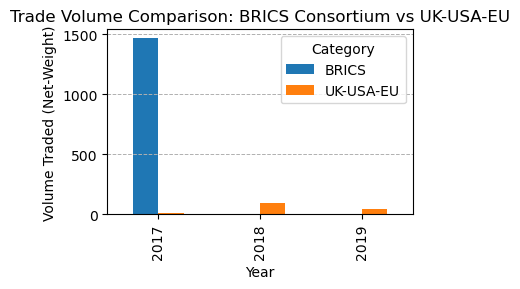

In [64]:
# Define EU countries
eu_countries = [
    "Germany", "France", "Italy", "Spain", "Poland", "Netherlands", "Belgium", 
    "Sweden", "Austria", "Denmark", "Ireland", "Portugal", "Greece", "Czech Republic", 
    "Hungary", "Finland", "Slovakia", "Luxembourg", "Croatia", "Slovenia", "Lithuania", 
    "Latvia", "Estonia", "Cyprus", "Malta", "Bulgaria", "Romania"
]

# Define BRICS Consortium and UK-USA-EU
brics_countries = ["China", "Russia", "India"]
uk_usa_eu = ["United Kingdom", "United States"] + eu_countries

# Create a new column to classify partner countries
def classify_partner(partner):
    if partner in brics_countries:
        return "BRICS"
    elif partner in uk_usa_eu:
        return "UK-USA-EU"
    else:
        return "Other"

tradedata['Category'] = tradedata['partnerDesc'].apply(classify_partner)

# Filter relevant categories
filtered_data = tradedata[tradedata['Category'].isin(["BRICS", "UK-USA-EU"])]

# Group by year and category, summing Net-Weight
grouped_data = filtered_data.groupby(['period', 'Category'])['Net-Weight'].sum().reset_index()

# Pivot for easier plotting
pivot_data = grouped_data.pivot(index='period', columns='Category', values='Net-Weight').fillna(0)

# Plot comparison using a bar chart
pivot_data.plot(kind='bar', figsize=(4,3))
plt.title('Trade Volume Comparison: BRICS Consortium vs UK-USA-EU')
plt.xlabel('Year')
plt.ylabel('Volume Traded (Net-Weight)')
plt.legend(title="Category")
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


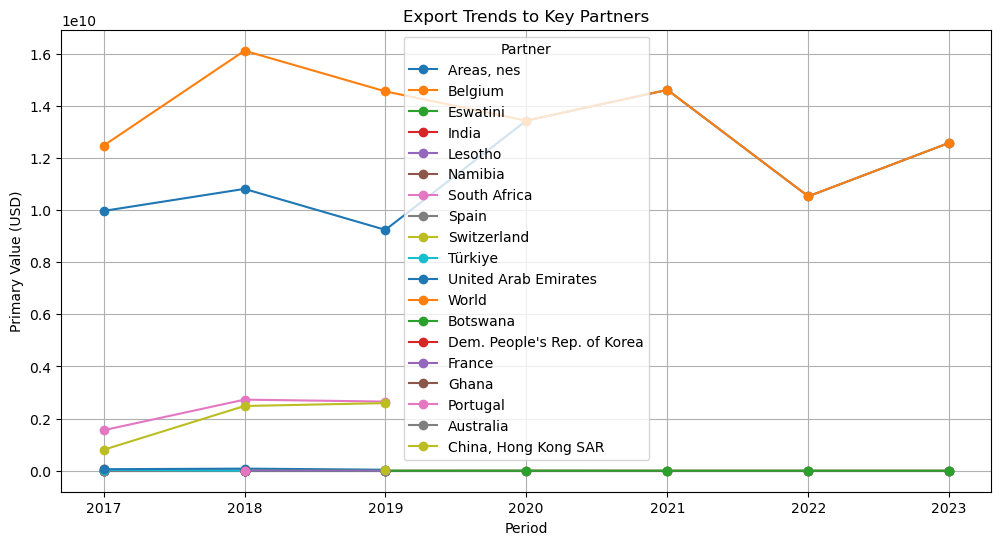

In [44]:
# Group by period and partner to analyze export trends
partner_trends = tradedata.groupby(['period', 'partnerDesc'])['primaryValue'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
for partner in partner_trends['partnerDesc'].unique():
    partner_data = partner_trends[partner_trends['partnerDesc'] == partner]
    plt.plot(partner_data['period'], partner_data['primaryValue'], marker='o', label=partner)

plt.title('Export Trends to Key Partners')
plt.xlabel('Period')
plt.ylabel('Primary Value (USD)')
plt.legend(title='Partner')
plt.grid(True)
plt.show()


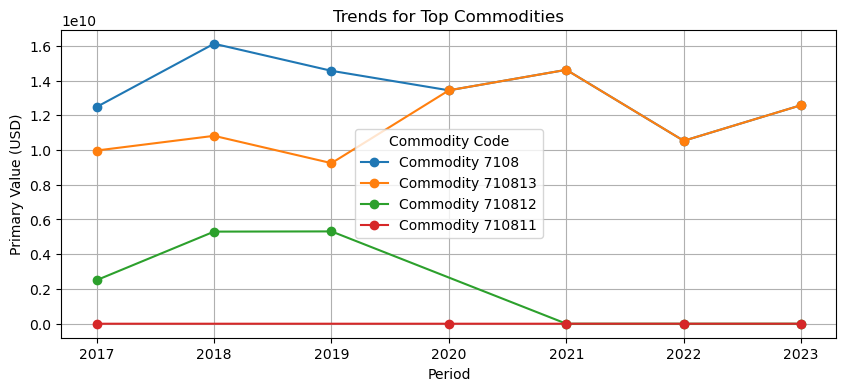

In [78]:
# Group by period and commodity
commodity_trends = tradedata.groupby(['period', 'cmdCode'])['primaryValue'].sum().reset_index()

# Plot trends for top 5 commodities
top_cmd_codes = commodity_trends.groupby('cmdCode')['primaryValue'].sum().nlargest(5).index
plt.figure(figsize=(10, 4))
for cmd in top_cmd_codes:
    cmd_data = commodity_trends[commodity_trends['cmdCode'] == cmd]
    plt.plot(cmd_data['period'], cmd_data['primaryValue'], marker='o', label=f'Commodity {cmd}')

plt.title('Trends for Top Commodities')
plt.xlabel('Period')
plt.ylabel('Primary Value (USD)')
plt.legend(title='Commodity Code')
plt.grid(True)
plt.show()


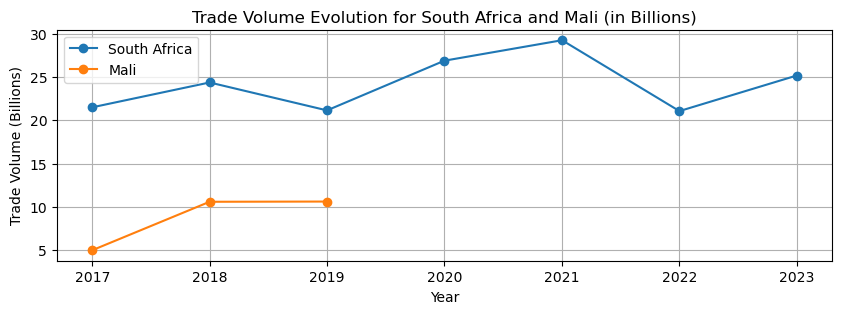

In [75]:
plt.figure(figsize=(10, 3))
plt.plot(south_africa_yearly['period'], south_africa_yearly['primaryValue'] / 1e9, marker='o', label='South Africa')
plt.plot(mali_yearly['period'], mali_yearly['primaryValue'] / 1e9, marker='o', label='Mali')
plt.title('Trade Volume Evolution for South Africa and Mali (in Billions)')
plt.xlabel('Year')
plt.ylabel('Trade Volume (Billions)')
plt.legend()
plt.grid(True)
plt.show()